In [43]:
#importing libraries

In [44]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
import ipywidgets as widgets
from ipywidgets import interactive
import tkinter as tk
from tkinter import ttk
from lifelines import KaplanMeierFitter
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.svm import SVC
from sklearn.ensemble import GradientBoostingClassifier, RandomForestClassifier, AdaBoostClassifier, ExtraTreesClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier

In [45]:
#reading dataset

In [1]:
df=pd.read_csv("EmployeeAttrition.csv")
scaler = StandardScaler()
scaler.fit(df)
df_scaled = scaler.transform(df)

NameError: name 'pd' is not defined

In [47]:
df.head()

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,Yes,Travel_Rarely,1102,Sales,1,2,Life Sciences,1,1,...,1,80,0,8,0,1,6,4,0,5
1,49,No,Travel_Frequently,279,Research & Development,8,1,Life Sciences,1,2,...,4,80,1,10,3,3,10,7,1,7
2,37,Yes,Travel_Rarely,1373,Research & Development,2,2,Other,1,4,...,2,80,0,7,3,3,0,0,0,0
3,33,No,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,1,5,...,3,80,0,8,3,3,8,7,3,0
4,27,No,Travel_Rarely,591,Research & Development,2,1,Medical,1,7,...,4,80,1,6,3,3,2,2,2,2


In [48]:
#encoding categorical values

In [49]:
def encode_columns(df, encoding_type='label'):

    categorical_columns = df.select_dtypes(include=['object']).columns.tolist()
    
    if encoding_type == 'label':
        
        for col in categorical_columns:
            df[col] = pd.factorize(df[col])[0]
    
    elif encoding_type == 'onehot':
        
        df = pd.get_dummies(df, columns=categorical_columns)
    
    return df


In [51]:
df_encoded = encode_columns(df, encoding_type='label')

In [52]:
df_encoded.head()

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,0,0,1102,0,1,2,0,1,1,...,1,80,0,8,0,1,6,4,0,5
1,49,1,1,279,1,8,1,0,1,2,...,4,80,1,10,3,3,10,7,1,7
2,37,0,0,1373,1,2,2,1,1,4,...,2,80,0,7,3,3,0,0,0,0
3,33,1,1,1392,1,3,4,0,1,5,...,3,80,0,8,3,3,8,7,3,0
4,27,1,0,591,1,2,1,2,1,7,...,4,80,1,6,3,3,2,2,2,2


In [53]:
#Model prediction and evaluation

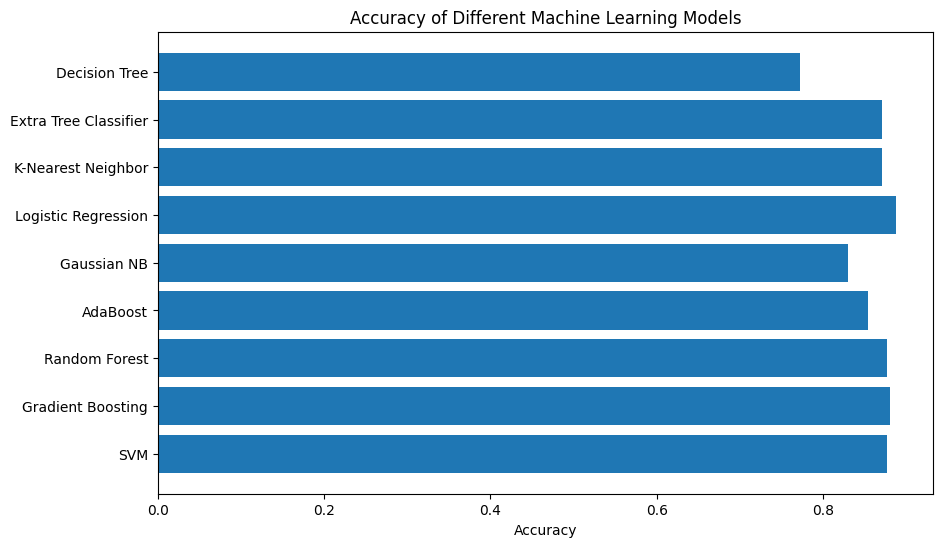

In [54]:
X = df_encoded.drop('Attrition', axis=1)
y = df_encoded['Attrition']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

classifiers = {
    'SVM': SVC(),
    'Gradient Boosting': GradientBoostingClassifier(),
    'Random Forest': RandomForestClassifier(),
    'AdaBoost': AdaBoostClassifier(),
    'Gaussian NB': GaussianNB(),
    'Logistic Regression': LogisticRegression(),
    'K-Nearest Neighbor': KNeighborsClassifier(),
    'Extra Tree Classifier': ExtraTreesClassifier(),
    'Decision Tree': DecisionTreeClassifier()
}

accuracies = {}
for name, classifier in classifiers.items():
    classifier.fit(X_train, y_train)
    y_pred = classifier.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred)
    accuracies[name] = accuracy

plt.figure(figsize=(10, 6))
plt.barh(list(accuracies.keys()), list(accuracies.values()))
plt.xlabel('Accuracy')
plt.title('Accuracy of Different Machine Learning Models')
plt.show()


In [56]:
#Suggestion function

In [57]:
def attrition_suggestions(attrition_status):
    suggestions = []

    if attrition_status == 'Yes':
        suggestions.append("Create a hybrid working environment, allowing employees to work from home on certain days of the week.")
        suggestions.append("Organize more spare-time events to build solid relationships and foster professional friendships among peers and colleagues.")
        suggestions.append("Distribute travel assignments more evenly, ensuring that each employee has the opportunity to travel without being overloaded.")
        suggestions.append("Improve and clarify incentive and promotion mechanisms to motivate and retain employees.")

    return suggestions


In [58]:
#checking the function

In [59]:
predicted_attrition = "Yes"  
suggestions = attrition_suggestions(predicted_attrition)


for suggestion in suggestions:
    print(suggestion)


Create a hybrid working environment, allowing employees to work from home on certain days of the week.
Organize more spare-time events to build solid relationships and foster professional friendships among peers and colleagues.
Distribute travel assignments more evenly, ensuring that each employee has the opportunity to travel without being overloaded.
Improve and clarify incentive and promotion mechanisms to motivate and retain employees.
